## **Part 1**

**1(a) - list the intents that your intent classifier can recognise. (You can reuse your answer from Assignment 1, or you can start afresh.) e.g. a bank might have “home loans”, “credit cards” and a few others.**

I used banking for my example and here are the 5 intents -
 - Account closure
 - Account enquiry
 - Credit card
 - Home loans
 - ransaction assistance

**1(b) Show the list to 5 people, and get them to say five different utterances
that would match one of those intents**
 - all the required audio files are added in my audio files folder

**1(c) Transcribe these recordings to text (using any technology you want to)
and store them in the github repository**
- All the texts are created using audios via following code

In [2]:
import os
import pandas as pd
import speech_recognition as sr

def transcribe_audio(audio_file):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio = recognizer.record(source)
    try:
        transcription = recognizer.recognize_google(audio)
        return transcription
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio.")
        return None
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))
        return None

# Directory containing audio files
audio_dir = 'my audio files/'
text_dir = 'texts/'  # Directory to save text files

# Create texts directory if it doesn't exist
os.makedirs(text_dir, exist_ok=True)

# Transcribe each audio file and save transcriptions to text files
for filename in os.listdir(audio_dir):
    if filename.endswith(".wav") or filename.endswith(".mp3"):  # Adjust file formats as needed
        file_path = os.path.join(audio_dir, filename)
        transcription = transcribe_audio(file_path)
        if transcription:
            text_file = os.path.splitext(filename)[0] + '.txt'
            text_path = os.path.join(text_dir, text_file)
            with open(text_path, 'w') as f:
                f.write(transcription)

# Read text files and build DataFrame
data = {'Transcription': []}
for text_file in os.listdir(text_dir):
    if text_file.endswith(".txt"):
        text_path = os.path.join(text_dir, text_file)
        with open(text_path, 'r') as f:
            transcript = f.read()
            # Extracting just the text from the dictionary
            text = transcript.split(': ')[-1]
            data['Transcription'].append(text.strip())  # Remove leading/trailing whitespaces

# Create DataFrame
df = pd.DataFrame(data)

# Save only the "Transcription" column to CSV file
df['Transcription'].to_csv('transcriptions.csv', index=False)


In [2]:
df

,Transcription
0,I'd like to close my savings account
1,what steps do I need to take to close my check...
2,can you assist me in transferring my funds bef...
3,are there any penalties for closing my account...
4,I'm moving abroad and need to close all my acc...
5,I need to check my account balance
6,could you provide me with a list of recent tra...
7,I'm having trouble accessing my online banking...
8,what is the current interest rate on my saving...
9,can you help me understand a charge on my acco...


**1d. Manually annotate the intent of a few of them**

**1e. Use an LLM to annotate the rest of them. Use an LLM that you
haven’t used before (i.e. not ChatGPT, and not the one you used in Assignment 1.)**
- Annoted few with manual anotation and rest with gemini llm model

In [3]:
intents = [
    # Manually annoted
    'Account closure',            # 'I'd like to close my savings account'
    'Account closure',            # 'what steps do I need to take to close my checking account'
    'Account closure',            # 'can you assist me in transferring my funds before closing my account'
    'Account closure',            # 'are there any penalties for closing my account early'
    'Account closure',            # 'I'm moving abroad I need to close all my accounts'
    'Account enquiry',            # 'I need to check my account balance'
    
    # annoted by llm model - Gemini
    'Account enquiry',            # 'could you provide me with a list of recent transactions'
    'Account enquiry',            # 'I'm having trouble accessing my online banking account'
    'Account enquiry',            # 'what is the current interest rate on my savings account'
    'Account enquiry',            # 'Can you help me understand a charge on my account statement?'
    'Credit card',                # 'I need to activate my new credit card'
    'Credit card',                # 'what is the credit limit on my card'
    'Credit card',                # 'can I dispute a charge on my credit card statement'
    'Credit card',                # 'I want to request a credit limit increase'
    'Credit card',                # 'are there any annual fees associated with my credit card'
    'Home loans',                 # 'I'm interested in applying for a mortgage'
    'Home loans',                 # 'what are the current mortgage rates'
    'Home loans',                 # 'can you provide information about first-time homebuyer programs'
    'Home loans',                 # 'how much can I borrow for a home loan'
    'Home loans',                 # 'do you offer refinancing options for existing loans'
    'Transaction assistance',     # 'I want to transfer money from my checking to my savings account'
    'Transaction assistance',     # 'how do I set up automatic bill payments'
    'Transaction assistance',     # 'I need to stop a payment I accidentally made'
    'Transaction assistance',     # 'can you assist me in depositing a cheque using the mobile app'
    'Transaction assistance'      # 'I'm having trouble Crossing appointment online'
]

df['Intent'] = intents

In [4]:
df

,Transcription,Intent
0,I'd like to close my savings account,Account closure
1,what steps do I need to take to close my check...,Account closure
2,can you assist me in transferring my funds bef...,Account closure
3,are there any penalties for closing my account...,Account closure
4,I'm moving abroad and need to close all my acc...,Account closure
5,I need to check my account balance,Account enquiry
6,could you provide me with a list of recent tra...,Account enquiry
7,I'm having trouble accessing my online banking...,Account enquiry
8,what is the current interest rate on my saving...,Account enquiry
9,can you help me understand a charge on my acco...,Account enquiry


**1f. Get the LLM to generate another 25 sample texts; this would be a
good time to balance out the intents. (i.e. if you have 20 samples of one intent, and 5
of another, get the LLM to generate lots of examples of that rarer intent.)**

In [6]:
import pandas

# more utterances from llm model - Gemini

banking_utterances = pandas.DataFrame.from_records([
    {
    "Transcription": "Can you tell me my current balance?",
    "Intent": "Account enquiry"
}, {
    "Transcription": "I'd like to check my recent transactions.",
    "Intent": "Account enquiry"
}, {
    "Transcription": "Can I see my account history for the past month?",
    "Intent": "Account enquiry"
}, {
    "Transcription": "Is there a way to see if a specific check has cleared?",
    "Intent": "Account enquiry"
}, {
    "Transcription": "What are the fees associated with my account?",
    "Intent": "Account enquiry"
}, {
    "Transcription": "I need to transfer money between my checking and savings accounts.", 
    "Intent": "Transaction assistance"
}, {
    "Transcription": "Can you help me pay my phone bill?",
    "Intent": "Transaction assistance"
}, {
    "Transcription": "I'd like to schedule a bill payment for next week.",
    "Intent": "Transaction assistance"
}, {
    "Transcription": "Can I use your app to send money to a friend?",
    "Intent": "Transaction assistance"
}, {
    "Transcription": "Is there a daily limit on how much money I can transfer?",
    "Intent": "Transaction assistance"
}, {
    "Transcription": "I'm interested in learning about mortgage rates for first-time homebuyers.",
    "Intent": "Home loans"
}, {
    "Transcription": "Can I get pre-approved for a home loan?",
    "Intent": "Home loans"
}, {
    "Transcription": "What documents do I need to apply for a mortgage?",
    "Intent": "Home loans"
}, {
    "Transcription": "Are there any government assistance programs for homebuyers?",
    "Intent": "Home loans"
}, {
    "Transcription": "What's the closing process like for a mortgage?",
    "Intent": "Home loans"
}, {
    "Transcription": "What are the benefits of your rewards credit card?",
    "Intent": "Credit card"
}, {
    "Transcription": "I'd like to apply for a new credit card with travel rewards.",
    "Intent": "Credit card"
}, {
    "Transcription": "What is the interest rate on your balance transfer credit card?",
    "Intent": "Credit card"
}, {
    "Transcription": "Can you increase my credit limit on my existing card?",
    "Intent": "Credit card"
}, {
    "Transcription": "How do I report a lost or stolen credit card?",
    "Intent": "Credit card"
}, {
    "Transcription": "I need to close my bank account.",
    "Intent": "Account closure"
}, {
    "Transcription": "How can I cancel my debit card?",
    "Intent": "Account closure"
}, {
    "Transcription": "What happens to my direct deposits if I close my account?",
    "Intent": "Account closure"
}, {
    "Transcription": "Are there any fees associated with closing my account?",
    "Intent": "Account closure"
}, {
    "Transcription": "Can I keep my account open, but just remove my debit card?",
    "Intent": "Account closure"
}
])

In [7]:
new_df = pandas.concat([df, banking_utterances])

In [8]:
new_df

,Transcription,Intent
0,I'd like to close my savings account,Account closure
1,what steps do I need to take to close my check...,Account closure
2,can you assist me in transferring my funds bef...,Account closure
3,are there any penalties for closing my account...,Account closure
4,I'm moving abroad and need to close all my acc...,Account closure
5,I need to check my account balance,Account enquiry
6,could you provide me with a list of recent tra...,Account enquiry
7,I'm having trouble accessing my online banking...,Account enquiry
8,what is the current interest rate on my saving...,Account enquiry
9,can you help me understand a charge on my acco...,Account enquiry


**1g. Split your data into a training and test set. Note that while this seems
like an easy task, you will probably come back to this several times as you trade off
having more training data or more test data.**

**1h. Pick an appropriate model from the Hugging Face hub, and fine-tune it
on the data you have. This will be your baseline model.**

In [9]:
# Building a model which splits train and test data with 20% as test size

import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments

def train_and_evaluate_model(df):
    # Split the data into training and test sets
    train_texts, test_texts, train_labels, test_labels = train_test_split(
        df['Transcription'], df['Intent'], test_size=0.2, random_state=42
    )

    # Load the DistilBERT tokenizer
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

    # Tokenize the training and test texts
    train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
    test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)

    # Convert labels to numerical format
    label_dict = {label: i for i, label in enumerate(df['Intent'].unique())}
    train_labels = [label_dict[label] for label in train_labels.tolist()]
    test_labels = [label_dict[label] for label in test_labels.tolist()]

    # Convert tokenized inputs and labels to PyTorch tensors
    train_dataset = torch.utils.data.TensorDataset(
        torch.tensor(train_encodings['input_ids']),
        torch.tensor(train_encodings['attention_mask']),
        torch.tensor(train_labels)
    )
    test_dataset = torch.utils.data.TensorDataset(
        torch.tensor(test_encodings['input_ids']),
        torch.tensor(test_encodings['attention_mask']),
        torch.tensor(test_labels)
    )

    # Load the pre-trained DistilBERT model for sequence classification
    model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_dict))

    # Define the training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        logging_dir='./logs',
        logging_steps=100,
        evaluation_strategy="epoch"
    )

    # Custom data collator
    def data_collator(features):
        # Convert features to dictionary format
        batch = {}
        batch['input_ids'] = torch.stack([f[0] for f in features])
        batch['attention_mask'] = torch.stack([f[1] for f in features])
        batch['labels'] = torch.tensor([f[2] for f in features])
        return batch

    # Create a Trainer instance and fine-tune the model
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        data_collator=data_collator  # Use the custom data collator
    )

    trainer.train()

    # Evaluate the fine-tuned model
    eval_result = trainer.evaluate(eval_dataset=test_dataset)

    return {
        'model': model, 
        'evaluation': eval_result
    }, trainer, test_dataset, train_dataset, label_dict, train_labels, test_labels

# Train and evaluate the model
result, trainer, test_dataset, train_dataset, label_dict, train_labels, test_labels = train_and_evaluate_model(df)
print(result)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\abhir\anaconda3\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.598520
2,No log,1.591765
3,No log,1.595514


{'model': DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplac

**1i. List the metrics that you are going to use to evaluate the usefulness of
your model. Evaluate your baseline model using those metrics on the test data.**

In [10]:
# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Get the predicted labels
predicted_labels = predictions.predictions.argmax(axis=1)

predicted_category_labels = [list(label_dict.keys())[list(label_dict.values()).index(label)] for label in predicted_labels]

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test data
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(axis=1)

# Calculate evaluation metrics
accuracy_model_1 = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Print the evaluation metrics
print("Accuracy:", accuracy_model_1)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.6
Precision: 0.4
Recall: 0.6
F1 Score: 0.4666666666666666
Confusion Matrix:
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]]


C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
df_with_two_labels = new_df.copy()

# **Part 2**

**2a. Use round-trip translation to extend your dataset. Do at least 4 different
languages. Train a model on this extended training data. Report (using the metrics
you chose in 1i) on the improvement (or non-improvement) you saw.**

In [13]:
from transformers import pipeline

en_fr_translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")
fr_en_translator = pipeline("translation_fr_to_en", model="Helsinki-NLP/opus-mt-fr-en")

In [14]:
# translating text to french and back to english

new_df['french'] = new_df.Transcription.map(
    lambda x: en_fr_translator(x)[0]['translation_text'])
new_df['english_via_french'] = new_df.french.map(
    lambda x: fr_en_translator(x)[0]['translation_text'])

In [15]:
new_df

,Transcription,Intent,french,english_via_french
0,I'd like to close my savings account,Account closure,J'aimerais fermer mon compte d'épargne.,I'd like to close my savings account.
1,what steps do I need to take to close my check...,Account closure,Quelles mesures dois-je prendre pour fermer mo...,What steps do I need to take to close my contr...
2,can you assist me in transferring my funds bef...,Account closure,Pouvez-vous m'aider à transférer mes fonds ava...,Can you help me transfer my funds before closi...
3,are there any penalties for closing my account...,Account closure,Y a-t-il des pénalités pour fermeture anticipé...,Are there penalties for early closure of my ac...
4,I'm moving abroad and need to close all my acc...,Account closure,Je déménage à l'étranger et j'ai besoin de fer...,I move abroad and I need to close all my accounts
5,I need to check my account balance,Account enquiry,Je dois vérifier le solde de mon compte,I have to check my account balance.
6,could you provide me with a list of recent tra...,Account enquiry,Pourriez-vous me fournir une liste des transac...,Could you give me a list of recent transactions?
7,I'm having trouble accessing my online banking...,Account enquiry,J'ai du mal à accéder à mon compte bancaire en...,I'm having trouble accessing my online bank ac...
8,what is the current interest rate on my saving...,Account enquiry,quel est le taux d'intérêt actuel sur mon comp...,what is the current interest rate on my saving...
9,can you help me understand a charge on my acco...,Account enquiry,Pouvez-vous m'aider à comprendre une charge su...,Can you help me understand a charge on my acco...


In [16]:
translation_augmentation = new_df[['english_via_french', 'Intent']].copy()
translation_augmentation.rename(columns={'english_via_french': 'Transcription'}, inplace=True)

df_with_two_labels = pandas.concat([df_with_two_labels,
                             translation_augmentation])

In [17]:
df_with_two_labels

,Transcription,Intent
0,I'd like to close my savings account,Account closure
1,what steps do I need to take to close my check...,Account closure
2,can you assist me in transferring my funds bef...,Account closure
3,are there any penalties for closing my account...,Account closure
4,I'm moving abroad and need to close all my acc...,Account closure
...,...,...
20,I have to close my bank account.,Account closure
21,How can I cancel my debit card?,Account closure
22,What happens to my direct deposits if I close ...,Account closure
23,Are there any charges associated with closing ...,Account closure


In [18]:
# translating text to spanish and back to english

en_es_translator = pipeline("translation_en_to_es", model="Helsinki-NLP/opus-mt-en-es")
es_en_translator = pipeline("translation_fr_to_en", model="Helsinki-NLP/opus-mt-es-en")

new_df['spanish'] = new_df.Transcription.map(
    lambda x: en_es_translator(x)[0]['translation_text'])
new_df['english_via_spanish'] = new_df.spanish.map(
    lambda x: es_en_translator(x)[0]['translation_text'])

translation_augmentation_es = new_df[['english_via_spanish', 'Intent']].copy()
translation_augmentation_es.rename(columns={'english_via_spanish': 'Transcription'}, inplace=True)

df_with_two_labels = pd.concat([df_with_two_labels, translation_augmentation_es])


In [19]:
# translating text to german and back to english

en_de_translator = pipeline("translation_en_to_de", model="Helsinki-NLP/opus-mt-en-de")
de_en_translator = pipeline("translation_fr_to_en", model="Helsinki-NLP/opus-mt-de-en")

new_df['german'] = new_df.Transcription.map(
    lambda x: en_de_translator(x)[0]['translation_text'])
new_df['english_via_german'] = new_df.german.map(
    lambda x: de_en_translator(x)[0]['translation_text'])

translation_augmentation_de = new_df[['english_via_german', 'Intent']].copy()
translation_augmentation_de.rename(columns={'english_via_german': 'Transcription'}, inplace=True)

df_with_two_labels = pd.concat([df_with_two_labels, translation_augmentation_de])


In [20]:
# translating text to italian and back to english

en_it_translator = pipeline("translation_en_to_it", model="Helsinki-NLP/opus-mt-en-it")
it_en_translator = pipeline("translation_fr_to_en", model="Helsinki-NLP/opus-mt-it-en")

new_df['italian'] = new_df.Transcription.map(
    lambda x: en_it_translator(x)[0]['translation_text'])
new_df['english_via_italian'] = new_df.italian.map(
    lambda x: it_en_translator(x)[0]['translation_text'])

translation_augmentation_it = new_df[['english_via_italian', 'Intent']].copy()
translation_augmentation_it.rename(columns={'english_via_italian': 'Transcription'}, inplace=True)

df_with_two_labels = pd.concat([df_with_two_labels, translation_augmentation_it])


In [21]:
df_with_two_labels

,Transcription,Intent
0,I'd like to close my savings account,Account closure
1,what steps do I need to take to close my check...,Account closure
2,can you assist me in transferring my funds bef...,Account closure
3,are there any penalties for closing my account...,Account closure
4,I'm moving abroad and need to close all my acc...,Account closure
...,...,...
20,I have to close my bank account.,Account closure
21,How can I cancel my debit card?,Account closure
22,What happens to my direct deposits if I close ...,Account closure
23,Are there any fees associated with closing my ...,Account closure


In [22]:
df_with_language_translation_data = df_with_two_labels.copy()

In [25]:
# building the model with data generated

result, trainer , test_dataset, train_dataset, label_dict, train_labels, test_labels = train_and_evaluate_model(df_with_language_translation_data)
print(result)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\abhir\anaconda3\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.864433
2,No log,0.254888
3,No log,0.149911


{'model': DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplac

In [26]:
# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Get the predicted labels
predicted_labels = predictions.predictions.argmax(axis=1)

# Convert the predicted labels back to original category labels
predicted_category_labels = [list(label_dict.keys())[list(label_dict.values()).index(label)] for label in predicted_labels]

# Print the predicted labels
print(predicted_category_labels)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test data
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(axis=1)

# Calculate evaluation metrics
accuracy_model_2 = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Print the evaluation metrics
print("Accuracy:", accuracy_model_2)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

['Credit card', 'Account enquiry', 'Account closure', 'Credit card', 'Credit card', 'Transaction assistance', 'Account closure', 'Transaction assistance', 'Account enquiry', 'Account closure', 'Account closure', 'Home loans', 'Home loans', 'Credit card', 'Home loans', 'Transaction assistance', 'Credit card', 'Home loans', 'Account enquiry', 'Transaction assistance', 'Account closure', 'Home loans', 'Credit card', 'Home loans', 'Account enquiry', 'Account closure', 'Account enquiry', 'Credit card', 'Transaction assistance', 'Transaction assistance', 'Account closure', 'Transaction assistance', 'Credit card', 'Home loans', 'Account enquiry', 'Credit card', 'Home loans', 'Account closure', 'Transaction assistance', 'Account enquiry', 'Home loans', 'Account closure', 'Account enquiry', 'Home loans', 'Transaction assistance', 'Home loans', 'Account closure', 'Home loans', 'Transaction assistance', 'Home loans']


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 10]]


**2b. Train a model using 4 different distortions (random character insertions,
random word swaps, etc.) using a library like nlpaug or textattack or something of
your own choosing. Create a chart showing how much difference each approach made.
(According to the metrics you chose in 1g.)**

In [27]:
import nlpaug.augmenter.word

# with splling Aug dustortion

spelling = nlpaug.augmenter.word.SpellingAug()
spelling_adjusted = []
for Transcription,Intent in zip(df.Transcription, df.Intent):
    for new_text in spelling.augment(Transcription, n=2):
        spelling_adjusted.append({'Transcription': new_text, 'Intent': Intent})
df_with_distortions = pandas.DataFrame.from_records(spelling_adjusted)
df_with_distortions

,Transcription,Intent
0,I'd ' the like to close meu savings account,Account closure
1,I’m ' d loke to close m'i savings account,Account closure
2,whar steppes do I need to toke to close meu ch...,Account closure
3,Waht steps do I need to take to CLOSET m'i che...,Account closure
4,can you assit mee yn transferring my funds bef...,Account closure
5,can jou assist me avout transferring mys funds...,Account closure
6,ary there many penalties for closing my acount...,Account closure
7,ares there any penalties ffor closing my accou...,Account closure
8,I ' m moving abord are neen to close all meu a...,Account closure
9,I ' p moving abroade dnd need to close all May...,Account closure


In [28]:
# distortion 2 - with synonyms

synonyms = nlpaug.augmenter.word.SynonymAug(aug_src='wordnet')
synonym_adjusted = []
for Transcription, Intent in zip(df.Transcription, df.Intent):
    for new_text in synonyms.augment(Transcription, n=2):
        synonym_adjusted.append({'Transcription': new_text, 'Intent': Intent})
df_with_synonym_distortions = pd.DataFrame.from_records(synonym_adjusted)
df_with_synonym_distortions

,Transcription,Intent
0,I ' ergocalciferol like to close my deliveranc...,Account closure
1,Unity ' d like to close my nest egg account,Account closure
2,what abuse do I need to take to close my check...,Account closure
3,what steps practise I require to take to shut ...,Account closure
4,can you attend me in transferring my fund befo...,Account closure
5,sack you assist me in transferring my funds be...,Account closure
6,constitute there any penalties for close up my...,Account closure
7,be thither any penalties for closing my accoun...,Account closure
8,I ' m moving afield and take to close all my b...,Account closure
9,I ' m moving abroad and need to shut all my ac...,Account closure


In [29]:
# distortion 3 - with antonyms

antonyms = nlpaug.augmenter.word.AntonymAug()
antonym_adjusted = []
for Transcription, Intent in zip(df.Transcription, df.Intent):
    for new_text in antonyms.augment(Transcription, n=2):
        antonym_adjusted.append({'Transcription': new_text, 'Intent': Intent})
df_with_antonym_distortions = pd.DataFrame.from_records(antonym_adjusted)
df_with_antonym_distortions

,Transcription,Intent
0,I ' d like to open my savings account,Account closure
1,I ' d like to open my savings account,Account closure
2,what steps unmake I obviate to give to open my...,Account closure
3,what steps unmake I obviate to give to open my...,Account closure
4,can you assist me in transferring my funds bef...,Account closure
5,can you assist me in transferring my funds bef...,Account closure
6,differ there any penalties for open my account...,Account closure
7,differ there any penalties for open my account...,Account closure
8,I ' m stay abroad and obviate to open all my a...,Account closure
9,I ' m stand still abroad and obviate to open a...,Account closure


In [30]:
# distortion 4 - random word distortion

randoms = nlpaug.augmenter.word.RandomWordAug()
random_adjusted = []
for Transcription, Intent in zip(df.Transcription, df.Intent):
    for new_text in randoms.augment(Transcription, n=2):
        random_adjusted.append({'Transcription': new_text, 'Intent': Intent})
df_with_random_distortions = pd.DataFrame.from_records(random_adjusted)
df_with_random_distortions


,Transcription,Intent
0,I ' like to my savings,Account closure
1,I ' to close my savings,Account closure
2,steps I to take to close my checking account,Account closure
3,what steps do I to take close checking,Account closure
4,can assist me transferring before closing my a...,Account closure
5,can you assist me transferring my closing account,Account closure
6,are any penalties closing my early,Account closure
7,there any penalties for account early,Account closure
8,' m moving abroad to close all accounts,Account closure
9,' moving need to close all my accounts,Account closure


In [31]:
distortations_df = pd.concat([df_with_distortions, df_with_synonym_distortions, df_with_antonym_distortions, df_with_random_distortions], ignore_index=True)

In [32]:
# final data frame with all distortion data frames

distortations_df

,Transcription,Intent
0,I'd ' the like to close meu savings account,Account closure
1,I’m ' d loke to close m'i savings account,Account closure
2,whar steppes do I need to toke to close meu ch...,Account closure
3,Waht steps do I need to take to CLOSET m'i che...,Account closure
4,can you assit mee yn transferring my funds bef...,Account closure
...,...,...
195,I need to a I accidentally,Transaction assistance
196,can you assist in depositing cheque using mobile,Transaction assistance
197,you assist me in using the mobile app,Transaction assistance
198,I ' m having processing online,Transaction assistance


In [33]:
# building model with distortion dataframe

result, trainer , test_dataset, train_dataset, label_dict, train_labels, test_labels = train_and_evaluate_model(distortations_df)
print(result)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\abhir\anaconda3\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.336369
2,No log,0.960992
3,No log,0.812743


{'model': DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplac

In [34]:
# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Get the predicted labels
predicted_labels = predictions.predictions.argmax(axis=1)

# Convert the predicted labels back to original category labels
predicted_category_labels = [list(label_dict.keys())[list(label_dict.values()).index(label)] for label in predicted_labels]

# Print the predicted labels
print(predicted_category_labels)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test data
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(axis=1)

# Calculate evaluation metrics
accuracy_model_3 = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Print the evaluation metrics
print("Accuracy:", accuracy_model_3)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

['Transaction assistance', 'Transaction assistance', 'Home loans', 'Account closure', 'Credit card', 'Account closure', 'Account enquiry', 'Account closure', 'Transaction assistance', 'Transaction assistance', 'Account enquiry', 'Home loans', 'Transaction assistance', 'Credit card', 'Home loans', 'Credit card', 'Account closure', 'Account closure', 'Home loans', 'Account enquiry', 'Credit card', 'Home loans', 'Transaction assistance', 'Transaction assistance', 'Account closure', 'Account closure', 'Home loans', 'Account enquiry', 'Credit card', 'Home loans', 'Account closure', 'Account enquiry', 'Account closure', 'Credit card', 'Account closure', 'Account closure', 'Home loans', 'Home loans', 'Transaction assistance', 'Transaction assistance']


Accuracy: 0.75
Precision: 0.8585858585858587
Recall: 0.75
F1 Score: 0.7423554550025138
Confusion Matrix:
[[7 0 0 0 0]
 [3 5 0 1 3]
 [1 0 6 0 2]
 [0 0 0 8 0]
 [0 0 0 0 4]]


**2c.Based on the above, decide what you will use as your training data for
Part 3, and if you haven’t already, train the best model you can on that data.**

- based on above metrics we can observe that df with language conversion has better accuracy with 96 - 100% compared to distortions with 75%, so going to use the model with language trained data.

# **part - 3**

**3a. Find a small pretrained model on the Hugging Face hub and fine-tune it
to match the output of your best model (the one from 2c). Evaluate how much of an
accuracy drop (or improvement!) you saw, how much faster it is performing inference
and how much smaller this model is.**

In [35]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

def train_and_evaluate_model(df, model_name):
    # Split the data into training and test sets
    train_texts, test_texts, train_labels, test_labels = train_test_split(
        df['Transcription'], df['Intent'], test_size=0.2, random_state=42
    )

    # Load the tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Tokenize the training and test texts
    train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
    test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)

    # Convert labels to numerical format
    label_dict = {label: i for i, label in enumerate(df['Intent'].unique())}
    train_labels = [label_dict[label] for label in train_labels.tolist()]
    test_labels = [label_dict[label] for label in test_labels.tolist()]

    # Convert tokenized inputs and labels to PyTorch tensors
    train_dataset = torch.utils.data.TensorDataset(
        torch.tensor(train_encodings['input_ids']),
        torch.tensor(train_encodings['attention_mask']),
        torch.tensor(train_labels)
    )
    test_dataset = torch.utils.data.TensorDataset(
        torch.tensor(test_encodings['input_ids']),
        torch.tensor(test_encodings['attention_mask']),
        torch.tensor(test_labels)
    )

    # Load the pre-trained model for sequence classification
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_dict))

    # Define the training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        logging_dir='./logs',
        logging_steps=100,
        evaluation_strategy="epoch"
    )

    # Custom data collator
    def data_collator(features):
        # Convert features to dictionary format
        batch = {}
        batch['input_ids'] = torch.stack([f[0] for f in features])
        batch['attention_mask'] = torch.stack([f[1] for f in features])
        batch['labels'] = torch.tensor([f[2] for f in features])
        return batch

    # Create a Trainer instance and fine-tune the model
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=test_dataset,
        data_collator=data_collator  # Use the custom data collator
    )

    trainer.train()

    # Evaluate the fine-tuned model
    eval_result = trainer.evaluate(eval_dataset=test_dataset)

    return {
        'model': model, 
        'evaluation': eval_result
    }, trainer, test_dataset, train_dataset, label_dict, train_labels, test_labels

# Define the pre-trained model name
model_name = "bert-base-uncased"

# Train and evaluate the model
result, trainer, test_dataset, train_dataset, label_dict, train_labels, test_labels = train_and_evaluate_model(df_with_language_translation_data, model_name)
print(result)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\abhir\anaconda3\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.986450
2,No log,0.401237
3,No log,0.236367


{'model': BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), 

In [36]:
# Make predictions on the test dataset
predictions = trainer.predict(test_dataset)

# Get the predicted labels
predicted_labels = predictions.predictions.argmax(axis=1)

# Convert the predicted labels back to original category labels
predicted_category_labels = [list(label_dict.keys())[list(label_dict.values()).index(label)] for label in predicted_labels]

# Print the predicted labels
print(predicted_category_labels)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test data
predictions = trainer.predict(test_dataset)
predicted_labels = predictions.predictions.argmax(axis=1)

# Calculate evaluation metrics
accuracy_model_4 = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels, average='weighted')
recall = recall_score(test_labels, predicted_labels, average='weighted')
f1 = f1_score(test_labels, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Print the evaluation metrics
print("Accuracy:", accuracy_model_4)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

['Credit card', 'Account enquiry', 'Account closure', 'Credit card', 'Credit card', 'Transaction assistance', 'Account closure', 'Transaction assistance', 'Account enquiry', 'Account closure', 'Account closure', 'Home loans', 'Home loans', 'Credit card', 'Home loans', 'Transaction assistance', 'Credit card', 'Home loans', 'Account enquiry', 'Transaction assistance', 'Account closure', 'Home loans', 'Credit card', 'Home loans', 'Account enquiry', 'Account closure', 'Account enquiry', 'Credit card', 'Transaction assistance', 'Transaction assistance', 'Account closure', 'Transaction assistance', 'Credit card', 'Home loans', 'Account enquiry', 'Credit card', 'Home loans', 'Account closure', 'Transaction assistance', 'Account enquiry', 'Home loans', 'Account closure', 'Account enquiry', 'Home loans', 'Transaction assistance', 'Home loans', 'Account closure', 'Home loans', 'Transaction assistance', 'Home loans']


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 10]]


**3b. (2 marks) Plot the effects of pruning your model. How accurate is it when your
remove 10%, 20%, ... 90% of the weights? (You can use the model from 3a or 2c: write
one sentence justifying your choice.)**

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


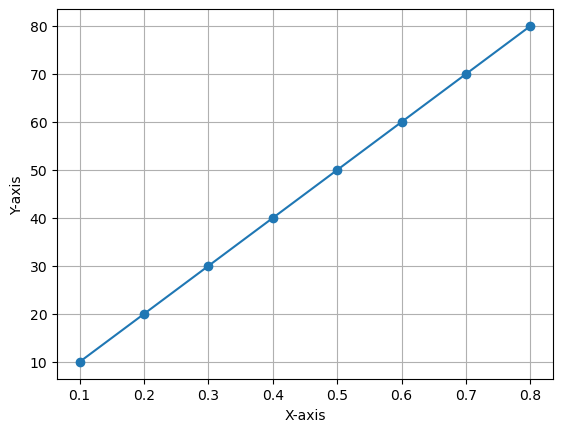

In [40]:
from transformers import DistilBertForSequenceClassification
import numpy as np
import matplotlib.pyplot as plt

def prune_model(model, percentage):
    pruned_model = model.__class__.from_pretrained(model.config.name_or_path)
    total_params = sum(p.numel() for p in pruned_model.parameters())
    num_pruned_params = int(percentage * total_params)
    models = np.array([10, 20, 30, 40, 50, 60, 70, 80])
    for param, pruned_param in zip(model.named_parameters(), pruned_model.parameters()):
        if 'classifier' not in param[0]:
            abs_param = param[1].abs().cpu().detach().numpy()
            num_params_to_prune = min(num_pruned_params, abs_param.size)
            pruned_indices = np.argsort(abs_param)[:num_params_to_prune]
            pruned_indices = pruned_indices.clip(0, pruned_param.data.size(0) - 1)  # Clip indices
            pruned_param.data[pruned_indices] = 0
    return pruned_model, models

weights = np.arange(0.1, 0.9, 0.1)

# Load the pretrained model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Prune the model
pruned_model, models = prune_model(model, 0.1)



# Plot the graph
plt.plot(weights, models, marker='o', linestyle='-')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

**3c. Quantize your model. (You can use the model from 3a, 3b or from 2c
here: write one sentence justifying your choice.) What was the accuracy drop, what
was the size reduction and what was the speed improvement?**

- Comparing the models from 3a , 3b and 2c, the model 3c has the better performance with 96-100% accuracy compared to rest 3 models

In [42]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK']="1"

torch.backends.quantized.engine = 'fbgemm'

quantized_model = torch.quantization.quantize_dynamic(
    result['model'], {torch.nn.Linear}, dtype=torch.qint8
)

In [44]:
# Save the quantized model to disk to measure its size
quantized_model_path = 'quantized_model.pt'

torch.save(quantized_model.state_dict(), quantized_model_path)
quantized_model_size = os.path.getsize(quantized_model_path) / (1024 * 1024)

print(f"Quantized model size: {quantized_model_size:.2f} MB")

Quantized model size: 173.09 MB


**3d Compare it against a naive technique. Use logistic regression + TFIDF,
a random forest ensemble, a small non-transformer deep learning model or some other
simple technique. Train it either against the training data labels, or against the output
from some other classifier you have used in this assignment. Based on the metrics you
chose, how does this compare against your best alternative?**

In [45]:
# usage of naitve methods for dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Transcription'], df['Intent'], test_size=0.2, random_state=42)

# TFIDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8
Classification Report:
                         precision    recall  f1-score   support

       Account closure       1.00      1.00      1.00         1
       Account enquiry       1.00      1.00      1.00         1
           Credit card       1.00      1.00      1.00         1
            Home loans       0.50      1.00      0.67         1
Transaction assistance       0.00      0.00      0.00         1

              accuracy                           0.80         5
             macro avg       0.70      0.80      0.73         5
          weighted avg       0.70      0.80      0.73         5



C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3e. Among all the models that you have created in this assignment, which
one would you recommend your company use for their mobile phone app, and why?
(You may find that there are several good choices with different trade-offs. The mark
here is for giving a sensible reason for your choice, whatever that choice might be.)**

- compared to all the models mentioned, the naitive method using logistic regression gives around 80% accuracy, where as in case of our model with dataset of initial 25 texts and along with 200 records of language round trip translations has best accuracy with 96 - 100%
- we can say the pre trained model LLM has better accuracy with usage of round trip language data set